<H1><center>Neural Architecture Search using MCGRAN</center></H1>

# Benchmark Tests

We compared the performance of MCGRAN against the Regularized Evolutionary Search and the Random Search methods.  We utilized the NAS-101 benchmark procedure defined in this [notebook](https://colab.research.google.com/github/google-research/nasbench/blob/master/NASBench.ipynb).

We restrict the search for Regularized Evolutionary and Random Search upto 1000 graph samples.  We use the sample size for MCGRAN.

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
!curl -O https://storage.googleapis.com/nasbench/nasbench_only108.tfrecord

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  498M  100  498M    0     0  58.4M      0  0:00:08  0:00:08 --:--:-- 71.7M


In [4]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 KB 5.0 MB/s eta 0:00:00


In [5]:
!pip install scipy==1.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [6]:
!pip install networkx==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.6 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [7]:
!python drive/MyDrive/Research-NAS/MCGRAN/run_exp.py -c drive/MyDrive/Research-NAS/MCGRAN/config/mcgran.yaml -b

2023-02-22 12:10:39.428358: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-22 12:10:40.275902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-22 12:10:40.276012: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2023-02-22 12:10:40.276030: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT War

# Evaluation

Evolutionary search and random search results are logged under the save dir folder mentioned in the mcgran.yml file.

In [32]:
import os
import pickle
import numpy as np

base_path = "/content/drive/MyDrive/Research-NAS/MCGRAN/exp/MCGRAN/1562"

In [33]:
file_name = os.path.join(base_path, 'evolutionary_search.p')
if os.path.exists(file_name):
   evolutionary_search = pickle.load(open(file_name, 'rb'))

In [34]:
file_name = os.path.join(base_path, 'random_search.p')
if os.path.exists(file_name):
   random_search = pickle.load(open(file_name, 'rb'))

In [14]:
test_accuracy_list = list()
#We use the experiment results of MCGRAN collected under the notebook_results folder.
base_path = "drive/MyDrive/Research-NAS/MCGRAN/exp/notebook_results"
experiment_folder_list = os.listdir(base_path)
for folder_name in experiment_folder_list:
    folder_name = os.path.join(base_path, folder_name)
    file_name = os.path.join(folder_name, 'generated_graph_test_accuracy_list.p')
    if os.path.exists(file_name):
        generated_graph_test_accuracy_list = pickle.load(open(file_name, 'rb'))
        test_accuracy_list.append(sum(generated_graph_test_accuracy_list)/len(generated_graph_test_accuracy_list))
test_accuracy_list = np.array(test_accuracy_list)

In [58]:
#vizualization for research paper
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd

df = pd.DataFrame({'MCGRAN': np.round(test_accuracy_list, 4), 
                   'Random Search': np.round(random_search['valid_graphs_test_accuracy'][:4],4), 
                   'Evolutionary Search': np.round(evolutionary_search['valid_graphs_test_accuracy'][:4], 4)})

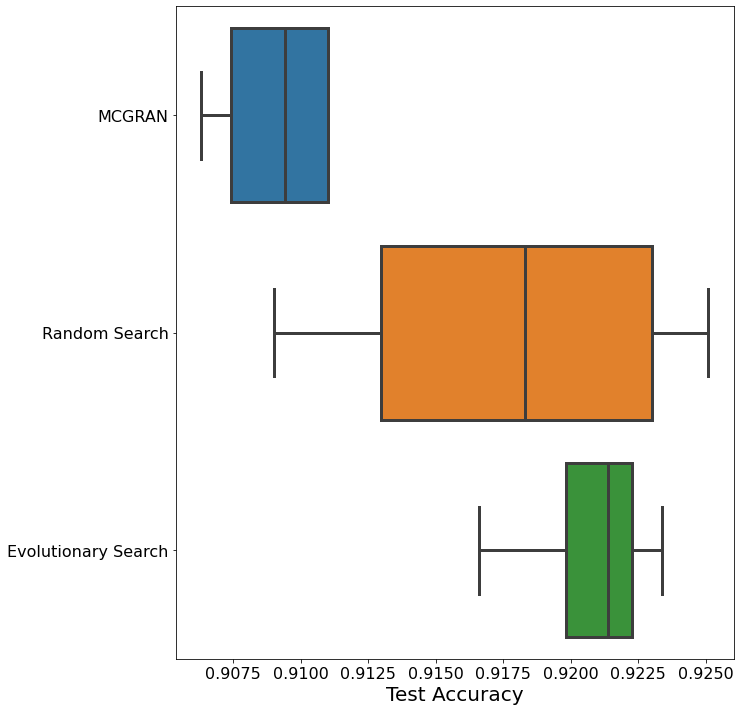

In [60]:
benchmarks_context = {
'axes.titlesize' : 24,
'axes.labelsize': 20,
'lines.linewidth' : 3,
'lines.markersize' : 10,
'xtick.labelsize' : 16,
'ytick.labelsize' : 16,
#'figure.figsize': (10, 12),
'savefig.bbox': 'tight'
}
plt.figure(figsize=(10, 12))
with mpl.rc_context(benchmarks_context):
  benchmarks_plot = sns.boxplot(data=df[['MCGRAN', 'Random Search', 'Evolutionary Search']], orient='h');
  plt.xlabel('Test Accuracy')
  plt.savefig('drive/MyDrive/Research-NAS/MCGRAN/exp/notebook_results/benchmarks.png')